# Analysis of NASA Asteroid data

## Overview

## Business Problem

## Data Understanding

### Loading the datasets

In [47]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway

from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


from sklearn.preprocessing import LabelEncoder

In [3]:
# loading in the data
nasa_df = pd.read_csv("data/nasa.csv")

nasa_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [5]:
nasa_df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


### Data Cleaning & Feature Engineering

In [6]:
# check null values
nasa_df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [12]:
# Wow, no null values!
# Let's do some feature engineering:
# create Est Dia in KM(avg) from the min and max

nasa_df["Est Dia in KM(avg)"] = (nasa_df["Est Dia in KM(min)"] + nasa_df["Est Dia in KM(max)"]) / 2
nasa_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,Est Dia in KM(avg)
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True,0.205846
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False,0.236343
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True,0.374578
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False,0.014241
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True,0.205846


In [16]:
# Change the Hazardous column to 1 and 0 instead of True and False
nasa_df["Hazardous"] = nasa_df["Hazardous"].replace({True: 1, False: 0})
nasa_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,Est Dia in KM(avg)
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1,0.205846
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0,0.236343
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1,0.374578
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0,0.014241
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1,0.205846


In [18]:
# Hazardous will be our target value
# Let's check the value counts of this
nasa_df["Hazardous"].value_counts()

Hazardous
0    3932
1     755
Name: count, dtype: int64

Looks like we have an imbalanced dataset. We will come back to this later.

In [24]:
# Use a LabelEncoder on the text columns in the dataframe
# for easier analysis

for column in nasa_df.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  nasa_df[column] = le.fit_transform(nasa_df[column])

nasa_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,Est Dia in KM(avg)
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,0,1,0.205846
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0,0,0.236343
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,0,1,0.374578
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0,0,0.014241
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,0,1,0.205846


In [25]:
# Drop irrelevant columns for analysis
# Neo Reference ID, Name, Est Dia in M(min), Est Dia in M(max),
# Est Dia in Feet(min), Est Dia in Feet(max), Epoch Date Close Approach
# Relative Velocity km per sec, Miles per hour, Miss Dist.(Astronomical)
# Miss Dist.(lunar), Miss Dist.(miles), Orbiting Body, Orbit ID, Equinox
# Est Dia in KM(min), Est Dia in KM(max)

analysis_df = nasa_df.drop(columns=["Neo Reference ID" , "Name", "Est Dia in M(min)", "Est Dia in M(max)",
                                    "Est Dia in Feet(min)", "Est Dia in Feet(max)", "Epoch Date Close Approach",
                                    "Relative Velocity km per sec", "Miles per hour", "Miss Dist.(Astronomical)",
                                    "Miss Dist.(lunar)", "Miss Dist.(miles)", "Orbiting Body", "Orbit ID", "Equinox",
                                    "Est Dia in KM(min)", "Est Dia in KM(max)", "Est Dia in Miles(min)", "Est Dia in Miles(max)"])
analysis_df.head()

,Absolute Magnitude,Close Approach Date,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,Est Dia in KM(avg)
0,21.6,0,22017.003799,62753692.0,534,5,0.025282,4.634,2458000.5,0.425549,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1,0.205846
1,21.3,0,65210.346095,57298148.0,432,3,0.186935,5.457,2458000.5,0.351674,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0,0.236343
2,20.3,1,27326.560182,7622911.5,1910,0,0.043058,4.557,2458000.5,0.348248,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1,0.374578
3,27.4,2,40225.948191,42683616.0,1761,6,0.005512,5.093,2458000.5,0.216578,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0,0.014241
4,21.6,2,35426.991794,61010824.0,1190,1,0.034798,5.154,2458000.5,0.210448,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1,0.205846


### Descriptive Analysis
- what's the average distance of hazardous asteroids? etc.
- 5-10

### Inferential Questions
- Use hypothesis tests
- 2-5

In [48]:
# do an ANOVA test to see if some features are more relevant to
# our target of Hazardous than others

category_cols = list(analysis_df.columns)
category_cols.remove("Hazardous")

target_feature = "Hazardous"

anova_results = {}

for feature in category_cols:
  # Group target values by the categories in the feature
  groups = [analysis_df[analysis_df[feature] == category][target_feature] for category in analysis_df[feature].unique()]

  # perform ANOVA test across the groups
  f_stat, p_value = f_oneway(*groups)

  # store the results in a dictionary
  anova_results[feature] = {"f_stat": f_stat, "p_value": p_value}

for feature, result in anova_results.items():
  print(f"Feature: {feature} F-statistic: {result['f_stat']} P-value: {result['p_value']}")

/opt/anaconda3/envs/Cohort-Env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:3869: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))
/opt/anaconda3/envs/Cohort-Env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


Feature: Absolute Magnitude F-statistic: 4.809762082927405 P-value: 7.60717842842449e-112
Feature: Close Approach Date F-statistic: 1.2185799209444166 P-value: 0.00013254538531315592
Feature: Relative Velocity km per hr F-statistic: nan P-value: nan
Feature: Miss Dist.(kilometers) F-statistic: inf P-value: 0.0
Feature: Orbit Determination Date F-statistic: 2.4463344390011503 P-value: 3.5973625626201225e-95
Feature: Orbit Uncertainity F-statistic: 66.77202671673297 P-value: 4.6074909586210585e-116
Feature: Minimum Orbit Intersection F-statistic: 347.33621390378767 P-value: 0.0
Feature: Jupiter Tisserand Invariant F-statistic: 2.4179961373027434 P-value: 2.072630049287884e-96
Feature: Epoch Osculation F-statistic: 0.7321700968469472 P-value: 0.9999831764232444
Feature: Eccentricity F-statistic: inf P-value: 0.0
Feature: Semi Major Axis F-statistic: inf P-value: 0.0
Feature: Inclination F-statistic: inf P-value: 0.0
Feature: Asc Node Longitude F-statistic: inf P-value: 0.0
Feature: Orbita

### Data Visualization

array([[<Axes: title={'center': 'Absolute Magnitude'}>,
        <Axes: title={'center': 'Close Approach Date'}>,
        <Axes: title={'center': 'Relative Velocity km per hr'}>,
        <Axes: title={'center': 'Miss Dist.(kilometers)'}>,
        <Axes: title={'center': 'Orbit Determination Date'}>],
       [<Axes: title={'center': 'Orbit Uncertainity'}>,
        <Axes: title={'center': 'Minimum Orbit Intersection'}>,
        <Axes: title={'center': 'Jupiter Tisserand Invariant'}>,
        <Axes: title={'center': 'Epoch Osculation'}>,
        <Axes: title={'center': 'Eccentricity'}>],
       [<Axes: title={'center': 'Semi Major Axis'}>,
        <Axes: title={'center': 'Inclination'}>,
        <Axes: title={'center': 'Asc Node Longitude'}>,
        <Axes: title={'center': 'Orbital Period'}>,
        <Axes: title={'center': 'Perihelion Distance'}>],
       [<Axes: title={'center': 'Perihelion Arg'}>,
        <Axes: title={'center': 'Aphelion Dist'}>,
        <Axes: title={'center': 'Perih

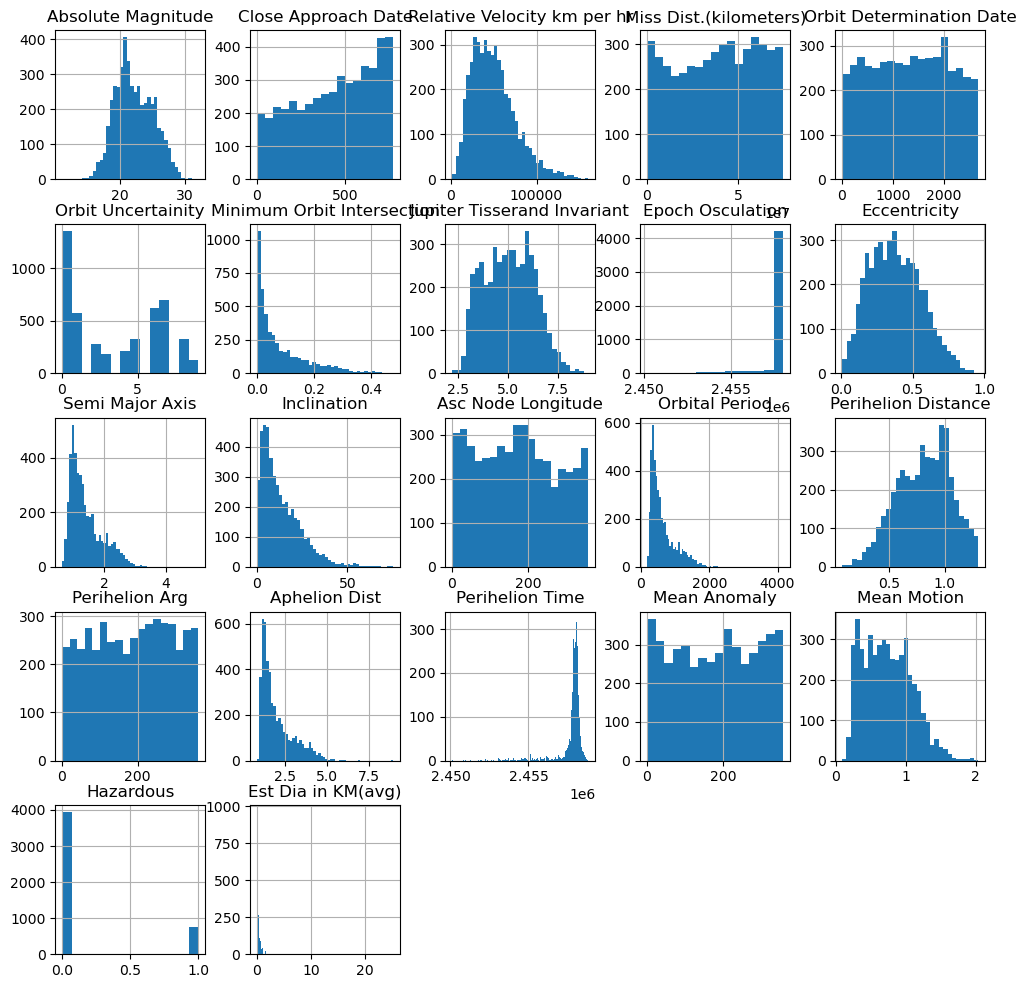

In [26]:
analysis_df.hist(bins="auto", figsize=(12,12))

<Axes: >

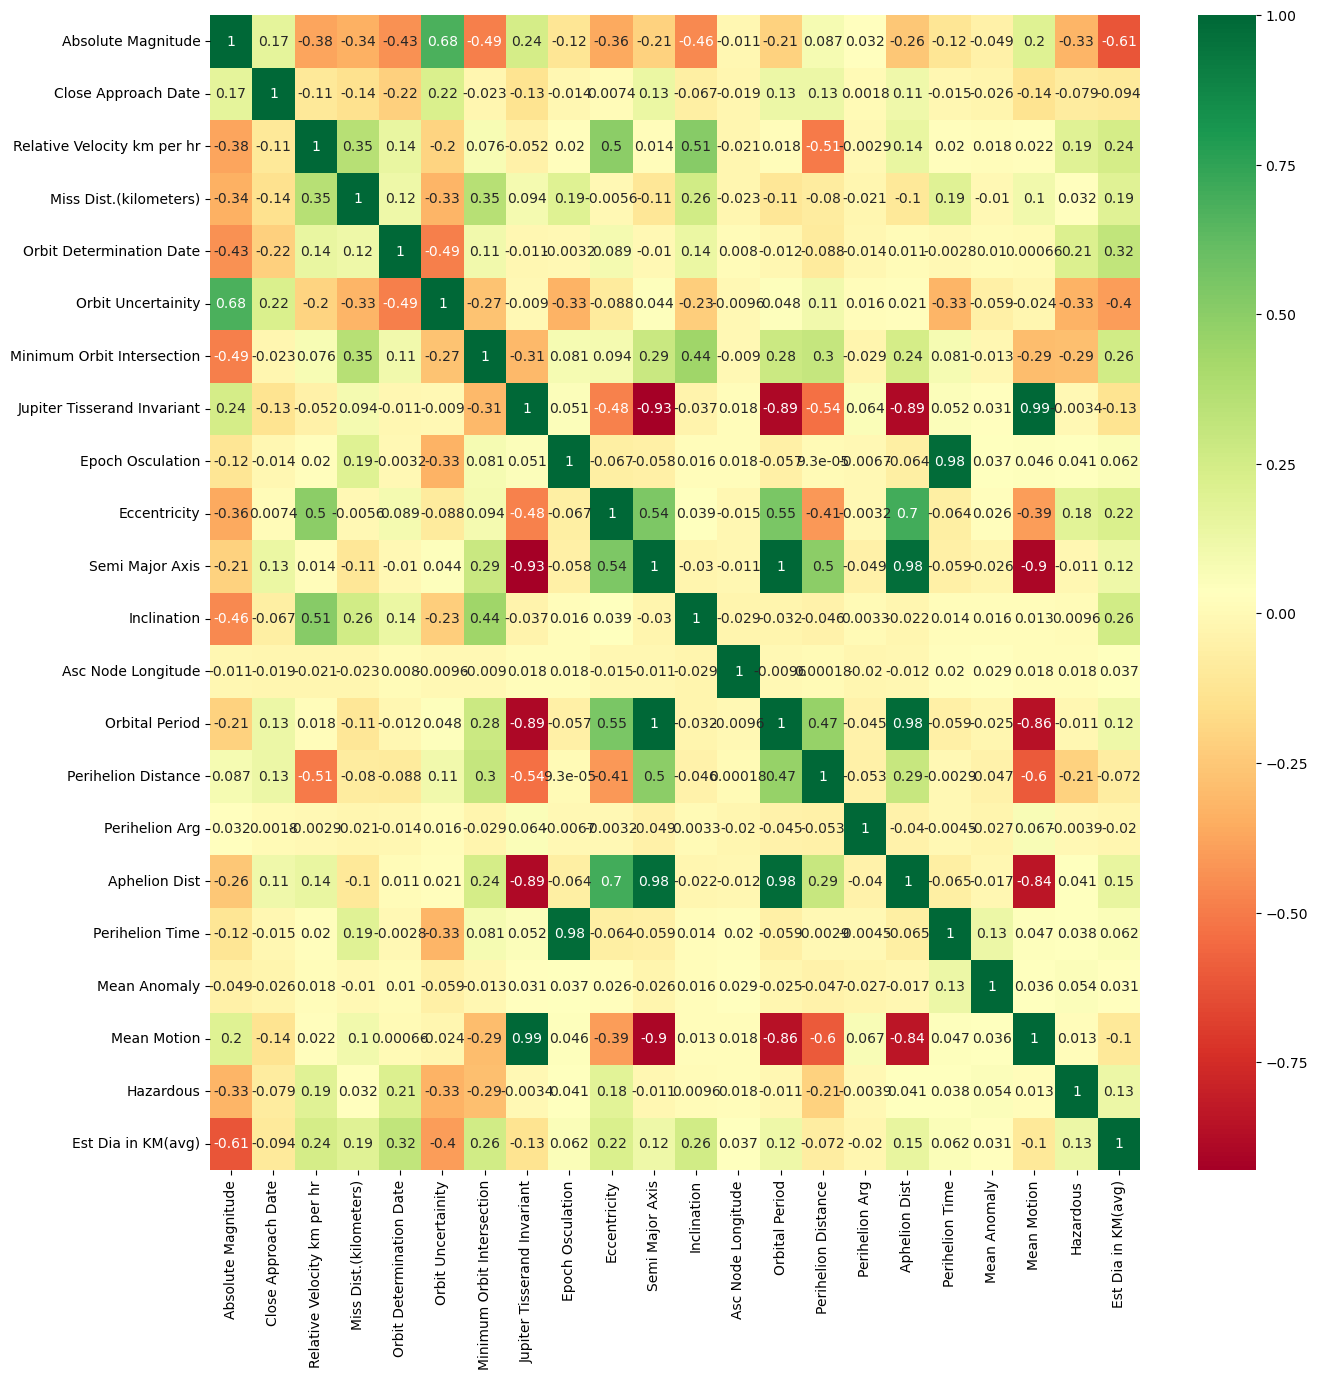

In [28]:
plt.figure(figsize=(15, 15))

sns.heatmap(analysis_df.corr(), annot=True, cmap="RdYlGn")

### Initial Data Analysis

In [ ]:
# From the above heatmap, we can see that some features could be dropped or combined because they are so closely correlated with one another
# Jupiter Tisserand Invariant vs Mean Motion
# Epoch Osculation vs Perihelion Time
# Aphelion Dist vs Semi Major Axis vs Orbital Period

# How should i combine them? PCA?
# Why are there some f-stats and p-values that are nan?
# based on the ANOVA, should we remove the columns that aren't super related?

In [ ]:
# Target Feature: Hazardous

## Summary
- initial analyses that would be useful for our audience
- did we reject null hypos for inferential analysis